In [1]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library("pairwiseAdonis"); packageVersion("pairwiseAdonis")


Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching packages ────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.1.2     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1
✔ dplyr   1.0.9     

── Conflicts ───────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()

Loading required package: cluster



[1] ‘0.0.1’

In [2]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list

tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data


taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [3]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA"))

In [4]:
ps_pre= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps_pre

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [5]:
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps_pre, !ID %in% dups & Genotype!=c("U41"))
                                                    #,"U44")) 
ps


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [6]:
subset_samples(ps_pre, Type=="Homogenate")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 7 samples ]
sample_data() Sample Data:       [ 7 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [7]:
ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_unpaired =subset_samples(ps_Clipped, Pairs=="unpaired")
ps_unpaired


ps_Am_Pl =subset_samples(ps_Clipped, Combo=="Ambient_Placebo")
ps_Am_Pl

ps_Am_Pa =subset_samples(ps_Clipped, Combo=="Ambient_Pathogen")
ps_Am_Pa

ps_NH_Pl =subset_samples(ps_Clipped, Combo=="NH4_Placebo")
ps_NH_Pl

ps_NH_Pa =subset_samples(ps_Clipped, Combo=="NH4_Pathogen")
ps_NH_Pa






ps_APl_APa =subset_samples(ps_paired, Nutrients =="Ambient")
ps_APl_APa

ps_APl_NPl =subset_samples(ps_Clipped, Diseased=="Placebo")
ps_APl_NPl

ps_APa_Npa =subset_samples(ps_paired, Diseased=="Pathogen")
ps_APa_Npa

ps_NPa_Npl =subset_samples(ps_Clipped, Nutrients =="NH4")
ps_NPa_Npl


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 56 samples ]
sample_data() Sample Data:       [ 56 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 42 samples ]
sample_data() Sample Data:       [ 42 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 30 samples ]
sample_data() Sample Data:       [ 30 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 64 samples ]
sample_data() Sample Data:       [ 64 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 56 samples ]
sample_data() Sample Data:       [ 56 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 106 samples ]
sample_data() Sample Data:       [ 106 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 58 samples ]
sample_data() Sample Data:       [ 58 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 120 samples ]
sample_data() Sample Data:       [ 120 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [8]:
ps_fill_clip = filter_taxa(ps_Clipped, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_clip
                           
ps_paired_fill = filter_taxa(ps_paired, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_paired_fill                          
                         

ps_APl_APa_fill = filter_taxa(ps_APl_APa, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_APl_APa_fill
                              
ps_APl_NPl_fill = filter_taxa(ps_APl_NPl, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_APl_NPl_fill
                              
                              
ps_APa_Npa_fill = filter_taxa(ps_APa_Npa, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_APa_Npa_fill
                              
ps_NPa_Npl_fill = filter_taxa(ps_NPa_Npl, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_NPa_Npl_fill
                              
                            
ps_Am_Pl_fill =filter_taxa(ps_Am_Pl, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_Am_Pl_fill                       

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 94 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 94 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 94 tips and 75 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 117 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 117 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 117 tips and 96 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 114 taxa and 62 samples ]
sample_data() Sample Data:       [ 62 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 114 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 114 tips and 94 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 69 taxa and 106 samples ]
sample_data() Sample Data:       [ 106 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 69 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 69 tips and 55 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 201 taxa and 58 samples ]
sample_data() Sample Data:       [ 58 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 201 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 201 tips and 168 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 88 taxa and 120 samples ]
sample_data() Sample Data:       [ 120 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 88 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 88 tips and 70 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 74 taxa and 42 samples ]
sample_data() Sample Data:       [ 42 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 74 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 74 tips and 59 internal nodes ]

In [9]:
ps_clr_clip <- microbiome::transform(ps_fill_clip, 'clr')
psr_clr.ord_clip <- ordinate(ps_clr_clip, "RDA", "euclidean")




ps_paired_fill_clr <- microbiome::transform(ps_paired_fill, 'clr')
ps_paired_fill_ord <- ordinate(ps_paired_fill_clr, "RDA", "euclidean")


ps_APl_APa_fill_clr <- microbiome::transform(ps_APl_APa_fill, 'clr')
ps_APl_APa_fill_clr_ord <- ordinate(ps_APl_APa_fill_clr, "RDA", "euclidean")

ps_APl_NPl_fill_clr <- microbiome::transform(ps_APl_NPl_fill, 'clr')
ps_APl_NPl_fill_clr_ord <- ordinate(ps_APl_NPl_fill_clr, "RDA", "euclidean")


ps_APa_Npa_fill_clr <- microbiome::transform(ps_APa_Npa_fill, 'clr')
ps_APa_Npa_fill_ord <- ordinate(ps_APa_Npa_fill_clr, "RDA", "euclidean")

ps_NPa_Npl_fill_clr <- microbiome::transform(ps_NPa_Npl_fill, 'clr')
ps_NPa_Npl_fill_ord <- ordinate(ps_NPa_Npl_fill_clr, "RDA", "euclidean")

                           
ps_Am_Pl_fill_clr <- microbiome::transform(ps_Am_Pl_fill, 'clr')
ps_Am_Pl_fill_ord <- ordinate(ps_Am_Pl_fill_clr, "RDA", "euclidean")

In [10]:
ps_clr <- vegdist(otu_table(t(ps_fill_clip)), method ="euclidean")
#ps_clr_df=as.data.frame(otu_table(ps_fill_clip))
ps_clr_meta= as(sample_data(ps_fill_clip), "data.frame")

adonis(ps_clr~Diseased*Nutrients*Genotype*Health, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean", by = "margin")


Call:
adonis(formula = ps_clr ~ Diseased * Nutrients * Genotype * Health,      data = ps_clr_meta, permutations = 999, method = "euclidean",      by = "margin") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                             Df  SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
Diseased                      1  186690048 186690048 15.1157 0.03648  0.001 ***
Nutrients                     1   70754475  70754475  5.7288 0.01383  0.006 ** 
Genotype                      9 2174413088 241601454 19.5617 0.42492  0.001 ***
Health                        1  327895405 327895405 26.5486 0.06408  0.001 ***
Diseased:Nutrients            1   27384636  27384636  2.2172 0.00535  0.121    
Diseased:Genotype             9  191897085  21321898  1.7264 0.03750  0.052 .  
Nutrients:Genotype            9  135334967  15037219  1.2175 0.02645  0.267    
Diseased:Health               1   28608937  28608937  2.3164 0.00559  0.095 .  
Nutrients:Health           

In [11]:
sample_data(ps_APl_APa) %>%
  group_by(Combo, Outcome) %>%
  summarize(Paired = n())

`summarise()` has grouped output by 'Combo'. You can override using the `.groups` argument.


Combo,Outcome,Paired
<chr>,<chr>,<int>
Ambient_Pathogen,Unaffected,3
Ambient_Pathogen,Unhealthy,23
Ambient_Placebo,Healthy,36


## AH vs AD = all ambient (paired)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                     diff       lwr      upr     p adj
Placebo-Pathogen 172.5703 -1382.925 1728.066 0.8251315



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df    Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups     1    449590  449590 0.0492    999  0.813
Residuals 60 547751548 9129192                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
         Pathogen Placebo
Pathogen            0.812
Placebo   0.82513        

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Diseased,1,71249866,0.05566787,6.504146,0.007
Genotype,9,637095957,0.49776620,6.462024,0.001
Diseased:Genotype,9,111473951,0.08709514,1.130673,0.330
Residual,42,460090277,0.35947079,NA,NA
Total,61,1279910049,1.00000000,NA,NA


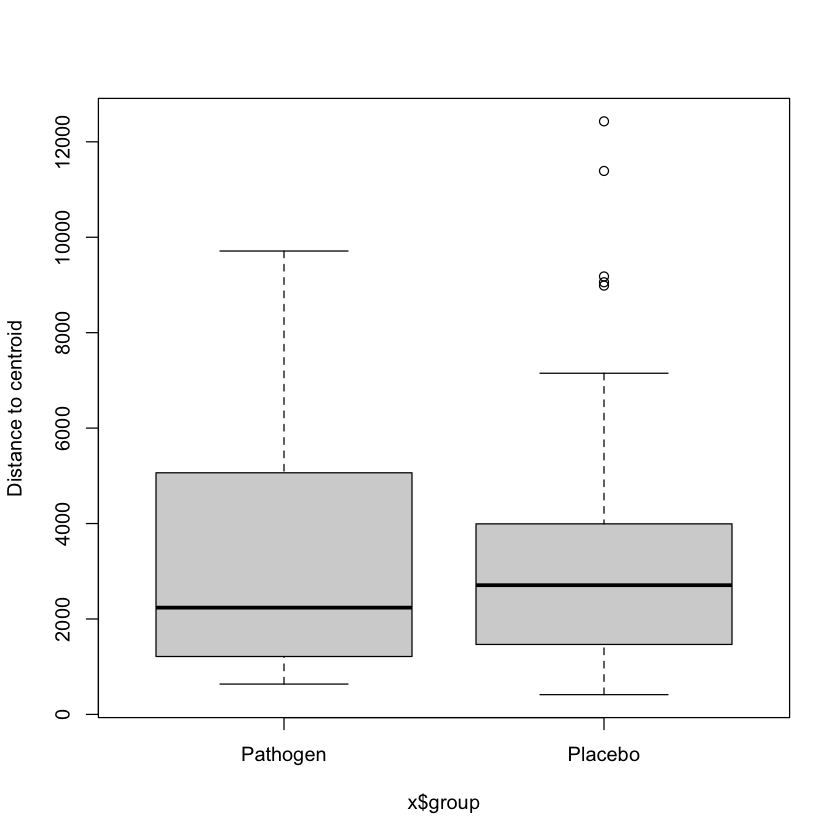

In [12]:
ps_clr <- vegdist(otu_table(t(ps_APl_APa_fill_clr)), method ="euclidean")
#ps_clr_df=as.data.frame(otu_table(ps_APl_APa_fill_clr))
ps_clr_meta= as(sample_data(ps_APl_APa_fill_clr), "data.frame")


#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_APl_APa_fill)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_APl_APa_fill)$Diseased)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)





adonis2(ps_clr~Diseased*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean", block="Genotype")

## AH vs NH = all placebo (all frags)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                diff       lwr      upr     p adj
NH4-Ambient 574.1203 -682.3115 1830.552 0.3669568



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df     Sum Sq  Mean Sq      F N.Perm Pr(>F)
Groups      1    8358516  8358516 0.8211    999  0.372
Residuals 104 1058699467 10179803                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
        Ambient   NH4
Ambient         0.369
NH4     0.36696      


Call:
adonis(formula = ps_clr ~ Nutrients * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                    Df  SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
Nutrients            1   52740740  52740740  3.9195 0.01816  0.030 *  
Genotype             9 1555755684 172861743 12.8465 0.53555  0.001 ***
Nutrients:Genotype   9  139249548  15472172  1.1498 0.04794  0.323    
Residuals           86 1157207279  13455899         0.39836           
Total              105 2904953251                   1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

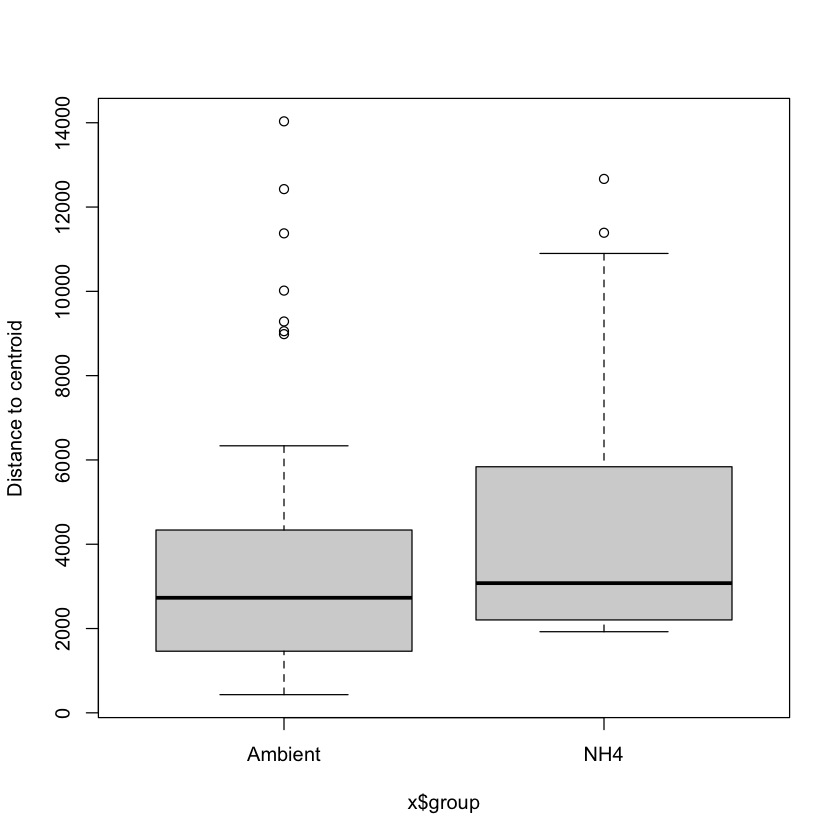

In [13]:
ps_clr <- vegdist(otu_table(t(ps_APl_NPl_fill_clr)), method ="euclidean")
#ps_clr_df=as.data.frame(otu_table(ps_APl_NPl_fill_clr))
ps_clr_meta= as(sample_data(ps_APl_NPl_fill_clr), "data.frame")


#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_APl_NPl_fill)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_APl_NPl_fill)$Nutrients)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)




adonis(ps_clr~Nutrients*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

## AD vs ND = No placebo  (paired)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                diff       lwr      upr     p adj
NH4-Ambient 562.4183 -778.1392 1902.976 0.4042354



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df    Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups     1   4537474 4537474 0.7063    999  0.389
Residuals 56 359739349 6423917                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
        Ambient   NH4
Ambient         0.382
NH4     0.40424      


Call:
adonis(formula = ps_clr ~ Nutrients, data = ps_clr_meta, permutations = 999,      method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df  SumsOfSqs  MeanSqs F.Model    R2 Pr(>F)
Nutrients  1   18482319 18482319  0.7949 0.014  0.411
Residuals 56 1302068490 23251223         0.986       
Total     57 1320550810                  1.000       


Call:
adonis(formula = ps_clr ~ Nutrients * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                   Df  SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Nutrients           1   18482319 18482319  1.0993 0.01400  0.292    
Genotype            9  532895167 59210574  3.5217 0.40354  0.001 ***
Nutrients:Genotype  9  130271150 14474572  0.8609 0.09865  0.609    
Residuals          38  638902173 16813215         0.48381           
Total              57 1320550810                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

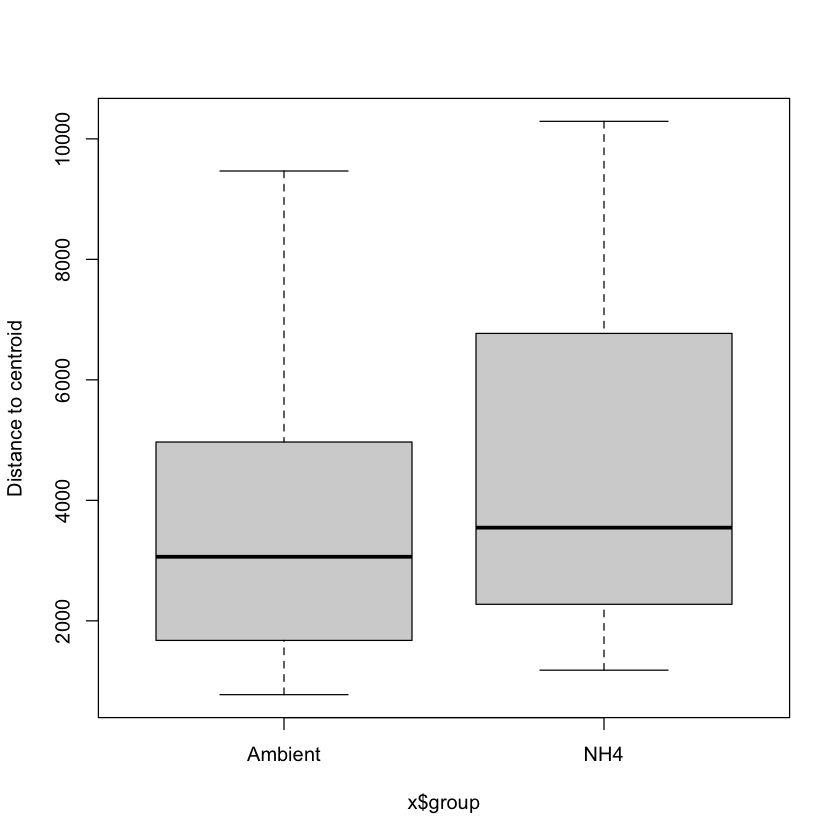

In [14]:
ps_clr <- vegdist(otu_table(t(ps_APa_Npa_fill_clr)), method ="euclidean")
#ps_clr_df=as.data.frame(otu_table(ps_APa_Npa_fill_clr))
ps_clr_meta= as(sample_data(ps_APa_Npa_fill_clr), "data.frame")


#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_APa_Npa_fill)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_APa_Npa_fill_clr)$Nutrients)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)



adonis(ps_clr~Nutrients, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

adonis(ps_clr~Nutrients*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

## ND vs NH = all nutrients. (All frags)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 88 taxa and 120 samples ]
sample_data() Sample Data:       [ 120 samples by 53 sample variables ]
tax_table()   Taxonomy Table:    [ 88 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 88 tips and 70 internal nodes ]

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                     diff      lwr     upr   p adj
Placebo-Pathogen 51.83256 -929.445 1033.11 0.91687



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df    Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups      1     80240   80240 0.0109    999  0.937
Residuals 118 865371790 7333659                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
         Pathogen Placebo
Pathogen            0.937
Placebo   0.91687        


Call:
adonis(formula = ps_clr ~ Diseased, data = ps_clr_meta, permutations = 999,      method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df  SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)  
Diseased    1   98418119 98418119  3.7413 0.03073  0.037 *
Residuals 118 3104070579 26305683         0.96927         
Total     119 3202488698                  1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = ps_clr ~ Diseased * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                   Df  SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
Diseased            1   98418119  98418119  6.8778 0.03073  0.004 ** 
Genotype            9 1515854288 168428254 11.7704 0.47334  0.001 ***
Diseased:Genotype   9  157271895  17474655  1.2212 0.04911  0.255    
Residuals         100 1430944396  14309444         0.44682           
Total             119 3202488698                   1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

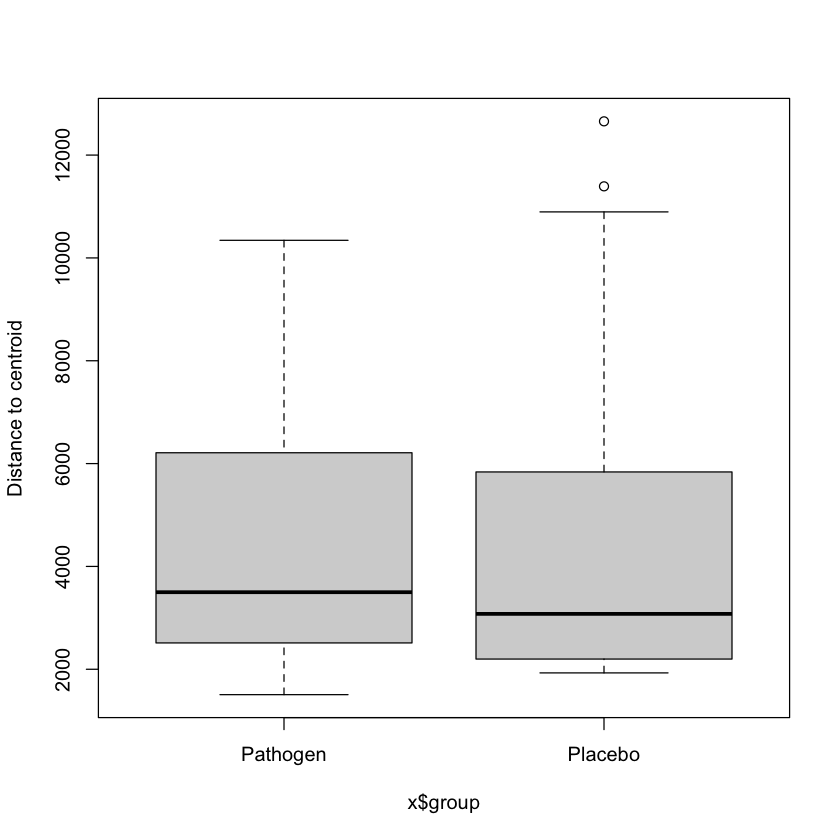

In [15]:
ps_NPa_Npl_fill_clr
#ps_clr_df=as.data.frame(otu_table(ps_NPa_Npl_fill_clr))
ps_clr_meta= as(sample_data(ps_NPa_Npl_fill_clr), "data.frame")


#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_NPa_Npl_fill)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_NPa_Npl_fill_clr)$Diseased)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)



adonis(ps_clr~Diseased, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

adonis(ps_clr~Diseased*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")


	Homogeneity of multivariate dispersions

Call: betadisper(d = ps_clr, group =
sample_data(ps_paired_fill_clr)$Combo)

No. of Positive Eigenvalues: 116
No. of Negative Eigenvalues: 0

Average distance to median:
Ambient_Pathogen  Ambient_Placebo     NH4_Pathogen      NH4_Placebo 
           18.83            12.31            20.38            13.95 

Eigenvalues for PCoA axes:
(Showing 8 of 116 eigenvalues)
PCoA1 PCoA2 PCoA3 PCoA4 PCoA5 PCoA6 PCoA7 PCoA8 
10019  7809  3622  2849  2277  1626  1441  1337 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                                      diff        lwr         upr     p adj
Ambient_Placebo-Ambient_Pathogen -6.517152 -11.514785 -1.51951894 0.0049995
NH4_Pathogen-Ambient_Pathogen     1.551809  -3.575137  6.67875518 0.8599481
NH4_Placebo-Ambient_Pathogen     -4.883517  -9.751681 -0.01535251 0.0489634
NH4_Pathogen-Ambient_Placebo      8.068961   3.351214 12.78670782 0.0001058
NH4_Placebo-Ambient_Placebo       1.633635  -2.801518  6.06878813 0.7731400
NH4_Placebo-NH4_Pathogen         -6.435326 -11.015700 -1.85495169 0.0020710



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq      F N.Perm Pr(>F)    
Groups      3 1484.9  494.96 8.8895    999  0.001 ***
Residuals 131 7294.0   55.68                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
                 Ambient_Pathogen Ambient_Placebo NH4_Pathogen NH4_Placebo
Ambient_Pathogen                       1.0000e-03   2.5300e-01       0.014
Ambient_Placebo        8.0408e-04                   1.0000e-03       0.408
NH4_Pathogen           2.4992e-01      2.1784e-05                    0.001
NH4_Placebo            1.3354e-02      4.2109e-01   7.0138e-04            

[1] 135   1

,mod$distances
,<dbl>
N115-247,22.641406
N211-A191,12.398033
N227-A105,30.486222
N228-A106,34.452514
N230-A162,9.756818
N233-A196,12.513773



Call:
adonis(formula = ps_clr ~ Combo, data = ps_clr_meta, permutations = 999,      method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Combo       3      4446 1481.95  4.6008 0.09532  0.001 ***
Residuals 131     42196  322.11         0.90468           
Total     134     46642                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Combo,3,4445.858,0.09531939,6.356468,0.001
Genotype,9,11314.888,0.24259168,5.392489,0.001
Combo:Genotype,27,8732.566,0.18722659,1.387266,0.003
Residual,95,22148.386,0.47486234,NA,NA
Total,134,46641.698,1.00000000,NA,NA


pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
NH4_Pathogen vs Ambient_Placebo,1,2268.6520,6.893456,0.09456893,0.001,0.006,*
NH4_Pathogen vs NH4_Placebo,1,2108.7669,6.013492,0.07808361,0.001,0.006,*
NH4_Pathogen vs Ambient_Pathogen,1,757.6677,1.785499,0.03089874,0.041,0.246,
Ambient_Placebo vs NH4_Placebo,1,298.7241,1.215477,0.01594791,0.212,1.000,
Ambient_Placebo vs Ambient_Pathogen,1,1817.8268,6.305300,0.09509496,0.001,0.006,*
NH4_Placebo vs Ambient_Pathogen,1,1676.5786,5.322448,0.07568633,0.001,0.006,*


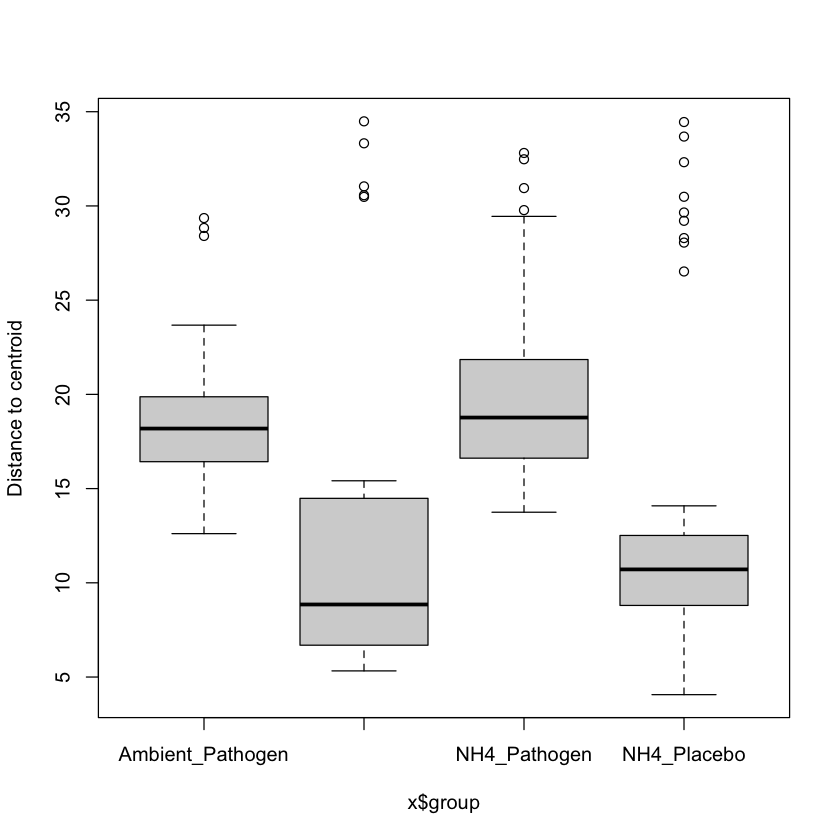

In [40]:
#ps_clr_df=as.data.frame(otu_table(ps_clr_fill_pair))
ps_clr_meta= as(sample_data(ps_paired_fill_clr), "data.frame")


#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_paired_fill_clr)), method ="euclidean")
## Calculate multivariate dispersions
mod <- betadisper(ps_clr, sample_data(ps_paired_fill_clr)$Combo)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
mod
TukeyHSD(mod)
permutest(mod, pairwise = TRUE, permutations = 999)
boxplot(mod)



mod_dist= as.data.frame(mod$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_paired_fill_clr), mod_dist) 
head(mod_dist)



adonis(ps_clr~Combo, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

adonis2(ps_clr~Combo*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean", block="Genotype")

pairwise.adonis(ps_clr, ps_clr_meta$Combo, sim.method = "euclidean",
                p.adjust.m = "bonferroni")

In [36]:
ps_clr_df=as.data.frame(otu_table(ps_paired_fill))
ps_clr_meta= as(sample_data(ps_paired_fill), "data.frame")
dim(ps_clr_df)
dim(ps_clr_meta)
sm = simper(t(ps_clr_df), ps_clr_meta$Combo)
summary(sm)


Contrast: NH4_Pathogen_Ambient_Placebo 

                                   average        sd  ratio       ava       avb
ff3e7637bd5aac86cff3b72f9ee78f47 0.0514516 0.0401198 1.2824 2832.9062 4010.4444
c429cce2851f42f0d5a5f2b50fe18e33 0.0466924 0.0360768 1.2943 2599.3750 3661.6389
1f388d6a52fb1fe4e6010cd40d4cbda6 0.0428483 0.0336173 1.2746 2352.5000 3364.5833
af9929b8c403fc72989769d9876fc007 0.0395273 0.0310322 1.2738 2203.6562 3099.2778
1788860a6d5db952c73537bc4f00e6ec 0.0380715 0.0298161 1.2769 2118.6875 2996.4167
57cae3e69e447f81b06a7ab5275a3ea8 0.0336664 0.0264114 1.2747 1864.6562 2624.9722
615834b295798beef85aedd0dccb7cdf 0.0312358 0.0245852 1.2705 1720.5312 2443.3611
f242850c598d509ac98aea5999f2779f 0.0107489 0.0133850 0.8031  506.3125    0.5556
dcb7ebb3749df706e8921afcf88d7f93 0.0102449 0.0123559 0.8292  484.4375    0.5833
15a3c4daaad8676483fdd647f1856e73 0.0081253 0.0102245 0.7947  384.8125    0.0000
9f4fba73279cca1e6e4d28a252dc2500 0.0078648 0.0100518 0.7824  374.4688    0.000

In [17]:
adonis(ps_clr~Combo, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                          diff        lwr        upr     p adj
Unaffected-Healthy   -7.237023 -15.278041  0.8039948 0.0870371
Unhealthy-Healthy     6.887759   3.820091  9.9554269 0.0000013
Unhealthy-Unaffected 14.124782   6.020992 22.2285720 0.0001869



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq     F N.Perm Pr(>F)    
Groups      2 2035.8  1017.9 18.92    999  0.001 ***
Residuals 132 7101.5    53.8                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
              Healthy Unaffected Unhealthy
Healthy               7.6000e-02     0.001
Unaffected 7.5769e-02                0.001
Unhealthy  6.3641e-07 4.6736e-08          


Call:
adonis(formula = ps_clr ~ Outcome, data = ps_clr_meta, permutations = 999,      method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model     R2 Pr(>F)    
Outcome     2      4445 2222.52  6.9525 0.0953  0.001 ***
Residuals 132     42197  319.67         0.9047           
Total     134     46642                 1.0000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = ps_clr ~ Outcome * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                  Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Outcome            2      4445 2222.52  9.1093 0.09530  0.001 ***
Genotype           9     10903 1211.46  4.9653 0.23376  0.001 ***
Outcome:Genotype   9      3479  386.61  1.5846 0.07460  0.002 ** 
Residuals        114     27814  243.98         0.59634           
Total            134     46642                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

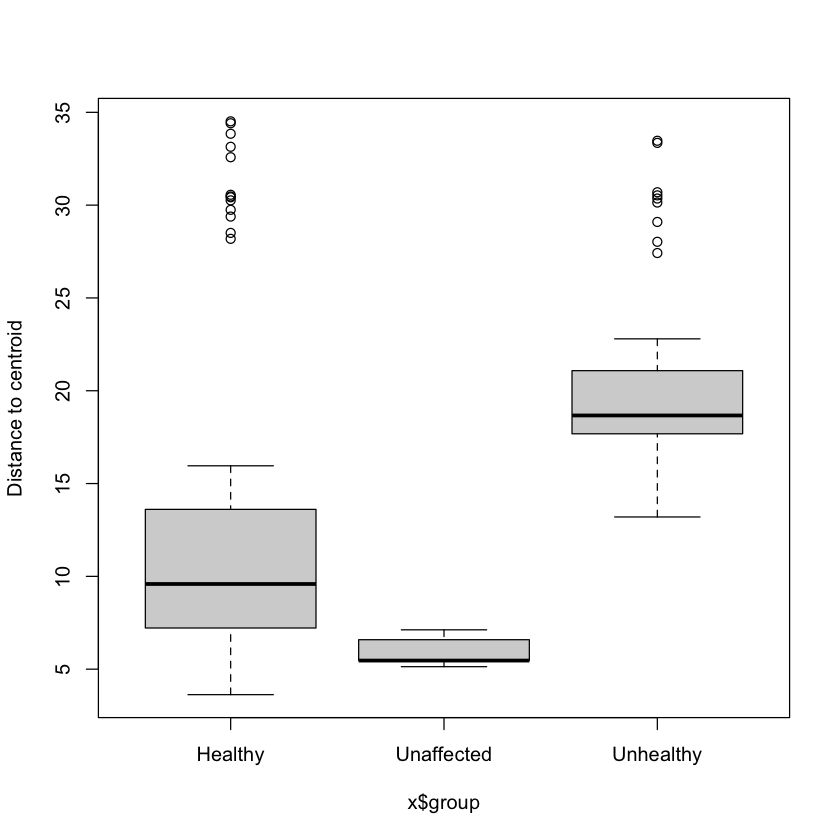

In [83]:
#ps_clr_df=as.data.frame(otu_table(ps_clr_fill_pair))
ps_clr_meta= as(sample_data(ps_paired_fill_clr), "data.frame")


#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_paired_fill_clr)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_paired_fill_clr)$Outcome)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)



adonis(ps_clr~Outcome, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

adonis(ps_clr~Outcome*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

#  Health state: Lesion vs Apparently healthy (not dispersed)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
          diff      lwr      upr p adj
DL-AH 7.023149 4.506596 9.539702 2e-07



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq      F N.Perm Pr(>F)    
Groups      1 1631.7 1631.73 30.471    999  0.001 ***
Residuals 133 7122.2   53.55                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           AH    DL
AH            0.001
DL 1.7109e-07      


Call:
adonis(formula = ps_clr ~ Health, data = ps_clr_meta, permutations = 999,      method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Health      1      3943  3942.7  12.281 0.08453  0.001 ***
Residuals 133     42699   321.0         0.91547           
Total     134     46642                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = ps_clr ~ Health * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                 Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Health            1      3943  3942.7 16.2120 0.08453  0.001 ***
Genotype          9     11181  1242.4  5.1084 0.23973  0.001 ***
Health:Genotype   9      3550   394.4  1.6218 0.07611  0.001 ***
Residuals       115     27968   243.2         0.59963           
Total           134     46642                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

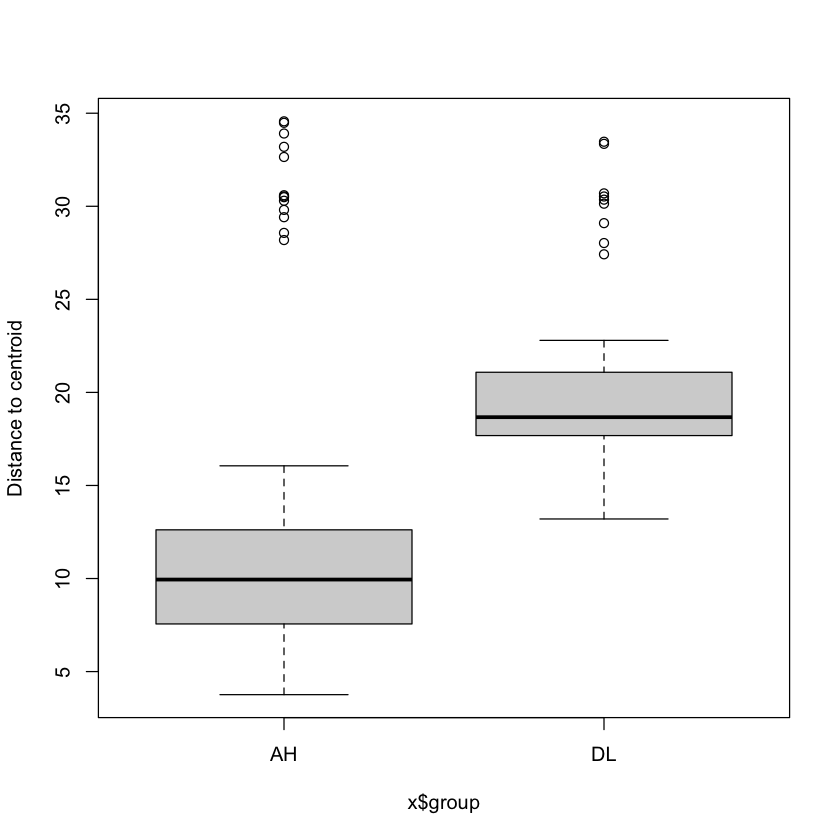

In [84]:
#ps_clr_df=as.data.frame(otu_table(ps_clr_fill_pair))
#ps_clr_meta= as(sample_data(ps_clr_fill_pair), "data.frame")


#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_paired_fill_clr)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_paired_fill_clr)$Health)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)


adonis(ps_clr~Health, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

adonis(ps_clr~Health*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

# Diseased : Placebo vs Diseased  (dispersed)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                      diff       lwr       upr p adj
Placebo-Pathogen -6.677942 -9.251045 -4.104839 1e-06



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq      F N.Perm Pr(>F)    
Groups      1 1475.3 1475.27 26.352    999  0.001 ***
Residuals 133 7445.9   55.98                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
          Pathogen Placebo
Pathogen             0.001
Placebo  9.873e-07        


Call:
adonis(formula = ps_clr ~ Diseased, data = ps_clr_meta, permutations = 999,      method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Diseased    1      3389  3389.5  10.423 0.07267  0.001 ***
Residuals 133     43252   325.2         0.92733           
Total     134     46642                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Call:
adonis(formula = ps_clr ~ Diseased * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                   Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Diseased            1      3389  3389.5 13.7256 0.07267  0.001 ***
Genotype            9     11379  1264.3  5.1197 0.24396  0.001 ***
Diseased:Genotype   9      3475   386.1  1.5635 0.07450  0.001 ***
Residuals         115     28399   246.9         0.60887           
Total             134     46642                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

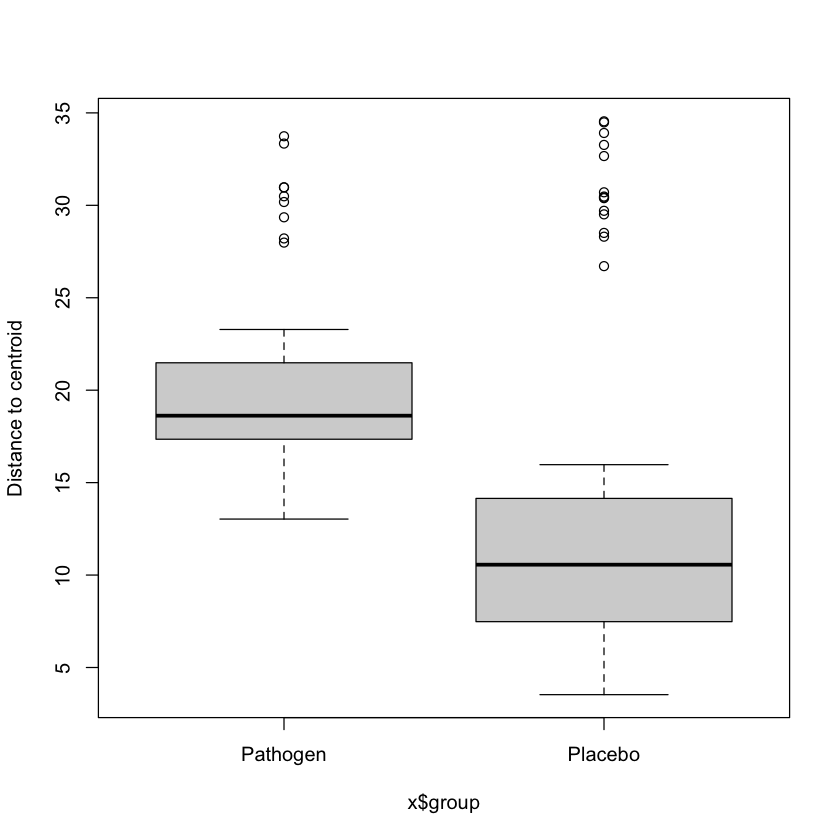

In [86]:

#distances between disease state
ps_clr <- vegdist(otu_table(t(ps_paired_fill_clr)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_paired_fill_clr)$Diseased)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)

# communties do not different in dispersion


adonis(ps_clr~Diseased, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

adonis(ps_clr~Diseased*Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

#pairwise.adonis(t(ps_clr_df), ps_clr_meta$Genotype, sim.method = "euclidean",
 #               p.adjust.m = "bonferroni")

#  Nutrients: Ambient vs NH4 (not dispersed)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 117 taxa and 135 samples ]
sample_data() Sample Data:       [ 135 samples by 44 sample variables ]
tax_table()   Taxonomy Table:    [ 117 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 117 tips and 96 internal nodes ]

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                diff       lwr     upr     p adj
NH4-Ambient 1.783983 -1.132814 4.70078 0.2285135



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups      1  106.7 106.699 1.4635    999  0.224
Residuals 133 9696.4  72.905                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
        Ambient   NH4
Ambient         0.227
NH4     0.22851      


Call:
adonis(formula = ps_clr ~ Nutrients, data = ps_clr_meta, permutations = 999,      method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)
Nutrients   1       519  519.26  1.4974 0.01113  0.113
Residuals 133     46122  346.79         0.98887       
Total     134     46642                 1.00000       


Call:
adonis(formula = ps_clr ~ Nutrients * Genotype, data = ps_clr_meta,      permutations = 999, method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                    Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Nutrients            1       519  519.26  1.8454 0.01113  0.033 *  
Genotype             9     11204 1244.86  4.4241 0.24021  0.001 ***
Nutrients:Genotype   9      2560  284.42  1.0108 0.05488  0.465    
Residuals          115     32359  281.38         0.69378           
Total              134     46642                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

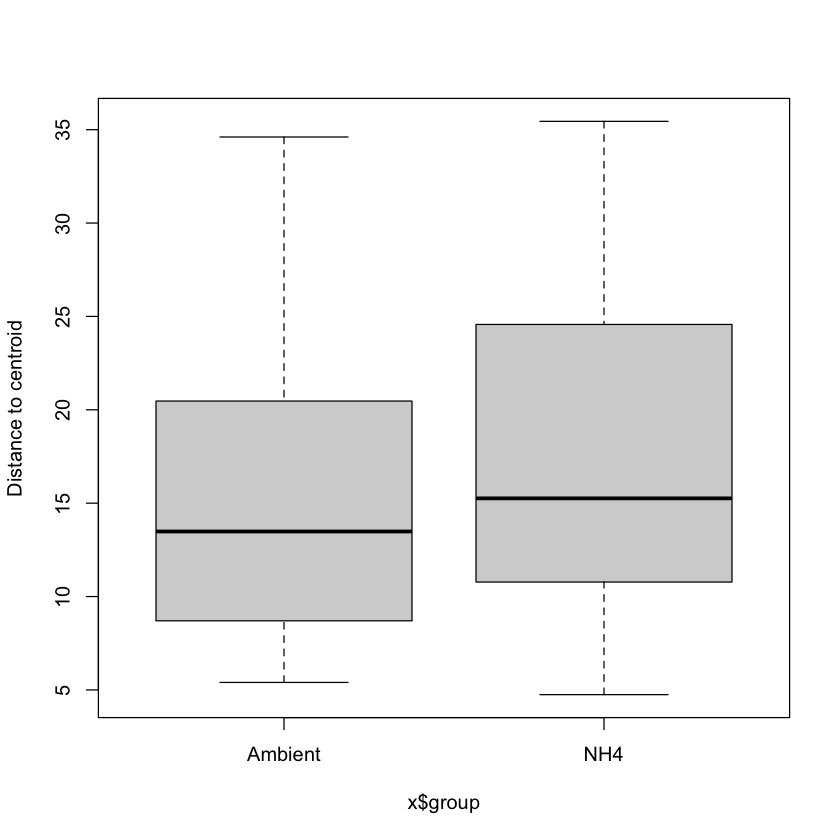

In [98]:
ps_paired_fill_clr
ps_clr <- vegdist(otu_table(t(ps_paired_fill_clr)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_paired_fill_clr)$Nutrients)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)



adonis(ps_clr~Nutrients , 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

adonis(ps_clr~Nutrients*Genotype , 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")

# Nursery: CRF vs FWC vs UM (dispersed)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
             diff        lwr       upr     p adj
FWC-CRF -9.290600 -11.982189 -6.599011 0.0000000
UM-CRF  -8.288466 -10.788459 -5.788474 0.0000000
UM-FWC   1.002134  -1.301127  3.305394 0.5442043



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)    
Groups     2 583.85 291.926 42.316    999  0.001 ***
Residuals 39 269.05   6.899                         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           CRF        FWC    UM
CRF            1.0000e-03 0.001
FWC 7.1247e-10            0.284
UM  7.5022e-08 3.1051e-01      


Call:
adonis(formula = ps_clr ~ Nursery, data = ps_clr_meta, permutations = 999,      method = "euclidean", block = "Genotype") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Nursery    2    2603.2 1301.61  7.7152 0.28349  0.001 ***
Residuals 39    6579.5  168.71         0.71651           
Total     41    9182.8                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

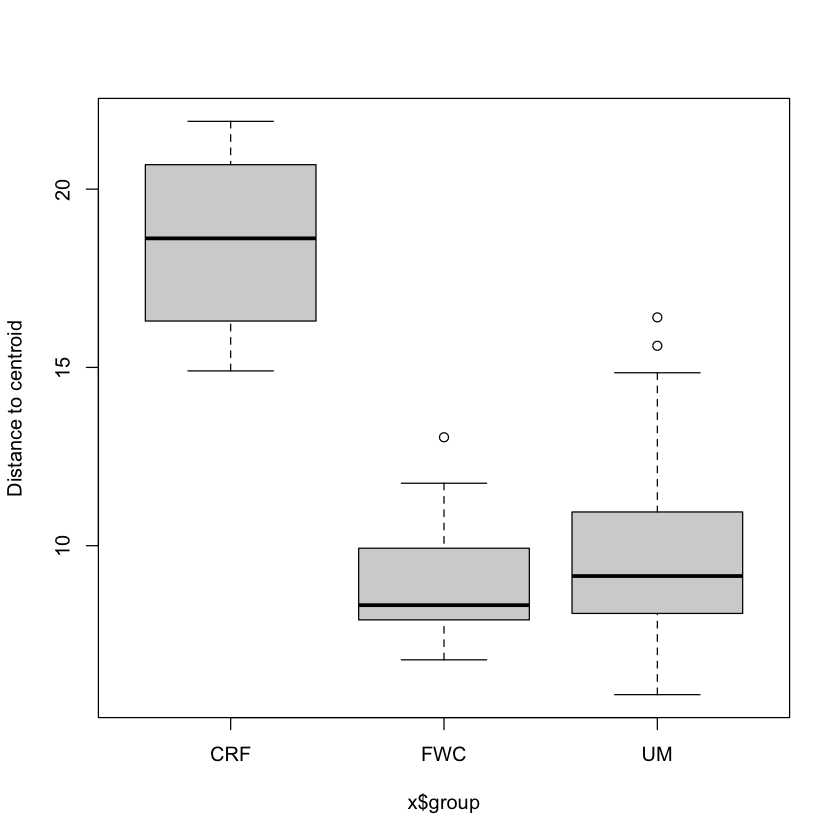

In [111]:
ps_clr_meta= as(sample_data(ps_Am_Pl_fill_clr), "data.frame")


ps_clr <- vegdist(otu_table(t(ps_Am_Pl_fill_clr)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_Am_Pl_fill_clr)$Nursery)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)


adonis(ps_clr~Nursery, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean", block="Genotype")



  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                         diff        lwr       upr     p adj
Cooper-9-Acerv2   -0.62988136  -7.952820  6.693057 0.9999996
Elkhorn-Acerv2     0.47627243  -8.075078  9.027622 1.0000000
FM14-Acerv2       -0.86814575  -8.674425  6.938133 0.9999962
FM19-Acerv2       -0.36811129  -8.919461  8.183239 1.0000000
FM6-Acerv2        -0.98598265  -9.537333  7.565367 0.9999948
FM9-Acerv2        -0.06104029  -8.612390  8.490310 1.0000000
K2-Acerv2         -1.22110219  -9.027381  6.585177 0.9999294
Kelsey-1-Acerv2    0.54869744  -6.774241  7.871636 0.9999999
U44-Acerv2         4.66217705  -2.319971 11.644325 0.4357062
Elkhorn-Cooper-9   1.10615378  -7.725643  9.937950 0.9999893
FM14-Cooper-9     -0.23826440  -8.350787  7.874259 1.0000000
FM19-Cooper-9      0.26177006  -8.570026  9.093566 1.0000000
FM6-Cooper-9      -0.35610129  -9.187898  8.475695 1.0000000
FM9-Cooper-9 


Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups     9 140.50  15.611 1.2305    999  0.296
Residuals 32 405.98  12.687                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
           Acerv2 Cooper-9  Elkhorn     FM14     FM19      FM6      FM9
Acerv2            0.785000 0.893000 0.739000 0.902000 0.755000 0.991000
Cooper-9 0.764942          0.531000 0.858000 0.834000 0.812000 0.768000
Elkhorn  0.870931 0.523686          0.551000 0.756000 0.564000 0.878000
FM14     0.721172 0.853582 0.525913          0.759000 0.956000 0.748000
FM19     0.892980 0.832040 0.700322 0.750868          0.744000 0.902000
FM6      0.725049 0.797054 0.542519 0.945521 0.713116          0.737000
FM9      0.983757 0.759437 0.853568 0.719874 0.898060 0.719010         
K2       0.659509 0.762446 0.562658 0.878103 0.738348 0.92


Call:
adonis(formula = ps_clr ~ Genotype, data = ps_clr_meta, permutations = 999,      method = "euclidean") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Genotype   9    5331.6  592.39  4.9223 0.58061  0.001 ***
Residuals 32    3851.2  120.35         0.41939           
Total     41    9182.8                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

Set of permutations < 'minperm'. Generating entire set.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

Set of permutations < 'minperm'. Generating entire set.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations < 'minperm'. Generating entire set.

Set of permutations < 'minperm'. Generating entire set.

Set of permutations < 'minperm'. Generating entire set.

'nperm' >= set of all permutations: complete enumeration.

Set of permutations

pairs,Df,SumsOfSqs,F.Model,R2,p.value,p.adjusted,sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Cooper-9 vs FM19,1,243.24427,2.7143267,0.31147865,0.019,0.855,
Cooper-9 vs FM6,1,213.28555,2.5084380,0.29481769,0.025,1.000,
Cooper-9 vs FM9,1,243.04851,2.5898325,0.30149976,0.020,0.900,
Cooper-9 vs Kelsey-1,1,270.79556,2.6841788,0.25122930,0.011,0.495,
Cooper-9 vs FM14,1,228.63037,2.7605344,0.28282615,0.021,0.945,
Cooper-9 vs K2,1,266.50145,3.2193279,0.31502345,0.009,0.405,
Cooper-9 vs Acerv2,1,99.45844,1.0562378,0.10503310,0.388,1.000,
Cooper-9 vs Elkhorn,1,190.60802,1.9419218,0.24451535,0.032,1.000,
Cooper-9 vs U44,1,2715.68514,16.5879836,0.64827240,0.001,0.045,.


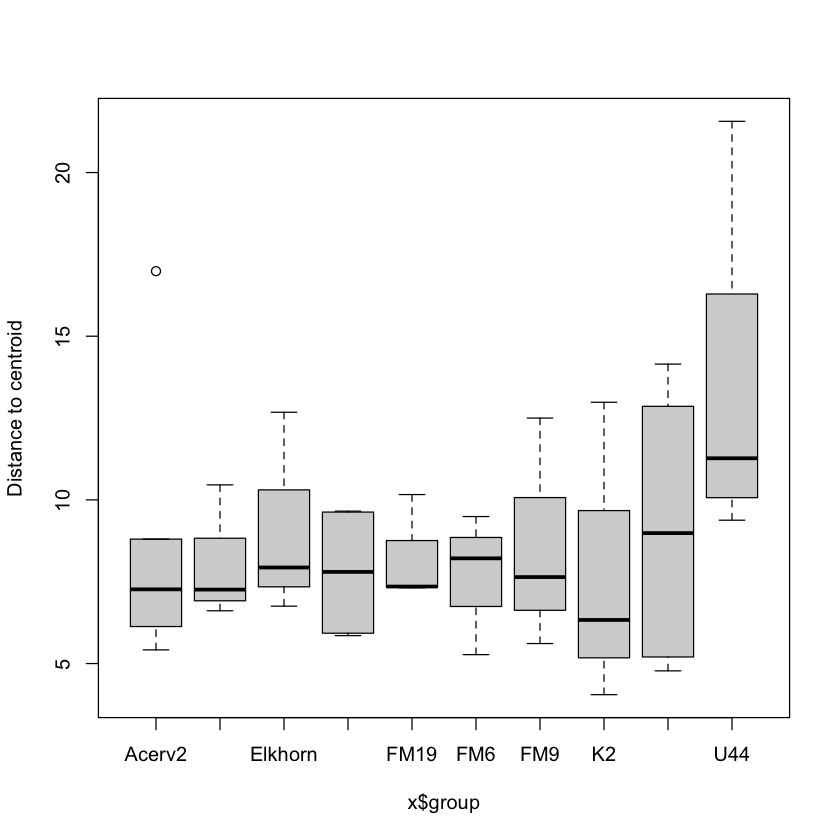

In [116]:
ps_clr_meta= as(sample_data(ps_Am_Pl_fill_clr), "data.frame")


ps_clr <- vegdist(otu_table(t(ps_Am_Pl_fill_clr)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_Am_Pl_fill_clr)$Genotype)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE, permutations = 999)
boxplot(mod_T1)


adonis(ps_clr~Genotype, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean")


pairwise.adonis(ps_clr, ps_clr_meta$Genotype, sim.method = "euclidean",
                p.adjust.m = "bonferroni")


# Nutrients susceptibility (dispersed)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                           diff       lwr       upr     p adj
Susceptible-Resistant -5.249172 -9.303192 -1.195153 0.0124627



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq Mean Sq      F N.Perm Pr(>F)  
Groups     1  288.66 288.659 6.8482    999  0.013 *
Residuals 40 1686.05  42.151                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
            Resistant Susceptible
Resistant                   0.014
Susceptible  0.012463            


Call:
adonis(formula = ps_clr ~ NH4_Susceptibility, data = ps_clr_meta,      permutations = 999, method = "euclidean", block = "Genotype") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                   Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)   
NH4_Susceptibility  1    1009.2 1009.24  4.9391 0.10991  0.003 **
Residuals          40    8173.5  204.34         0.89009          
Total              41    9182.8                 1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

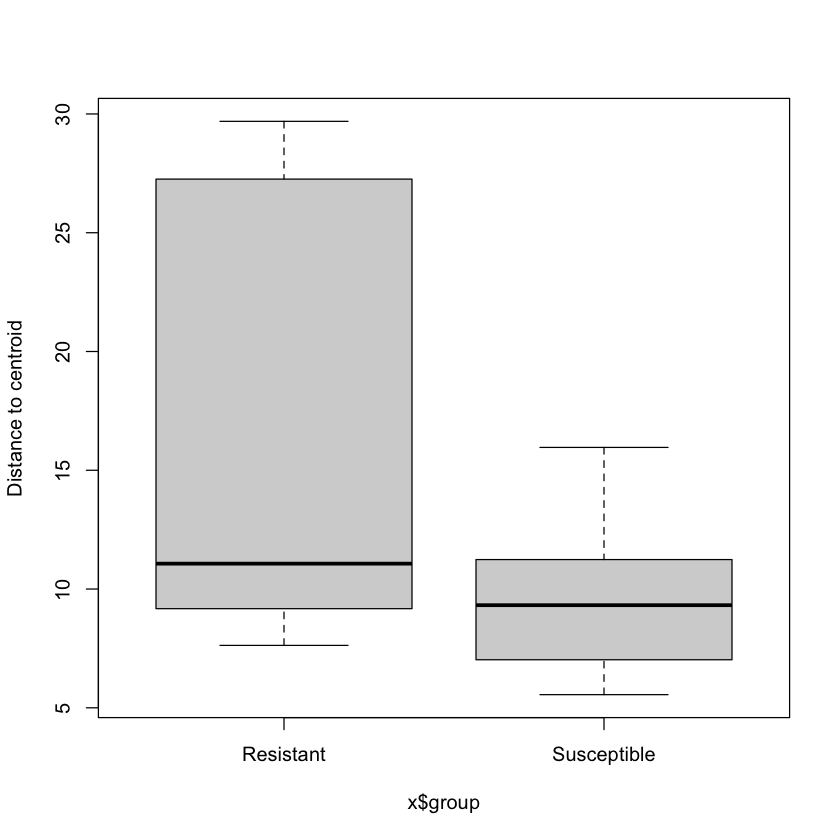

In [113]:


#distances between T-1 only test nutrient treatment
ps_clr <- vegdist(otu_table(t(ps_Am_Pl_fill_clr)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_Am_Pl_fill_clr)$NH4_Susceptibility)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE)
boxplot(mod_T1)


adonis(ps_clr~NH4_Susceptibility, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean", block="Genotype")


# Disease susceptibility (dispersed)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
                          diff      lwr      upr    p adj
Susceptible-Resistant 4.982666 -4.35256 14.31789 0.287163



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
          Df  Sum Sq Mean Sq      F N.Perm Pr(>F)
Groups     1   69.16  69.161 1.1637    999   0.23
Residuals 40 2377.28  59.432                     

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
            Resistant Susceptible
Resistant                   0.233
Susceptible   0.28716            


Call:
adonis(formula = ps_clr ~ Disease_Susceptibility, data = ps_clr_meta,      permutations = 999, method = "euclidean", block = "Genotype") 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                       Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)
Disease_Susceptibility  1     112.0  111.96 0.49374 0.01219  0.949
Residuals              40    9070.8  226.77         0.98781       
Total                  41    9182.8                 1.00000       

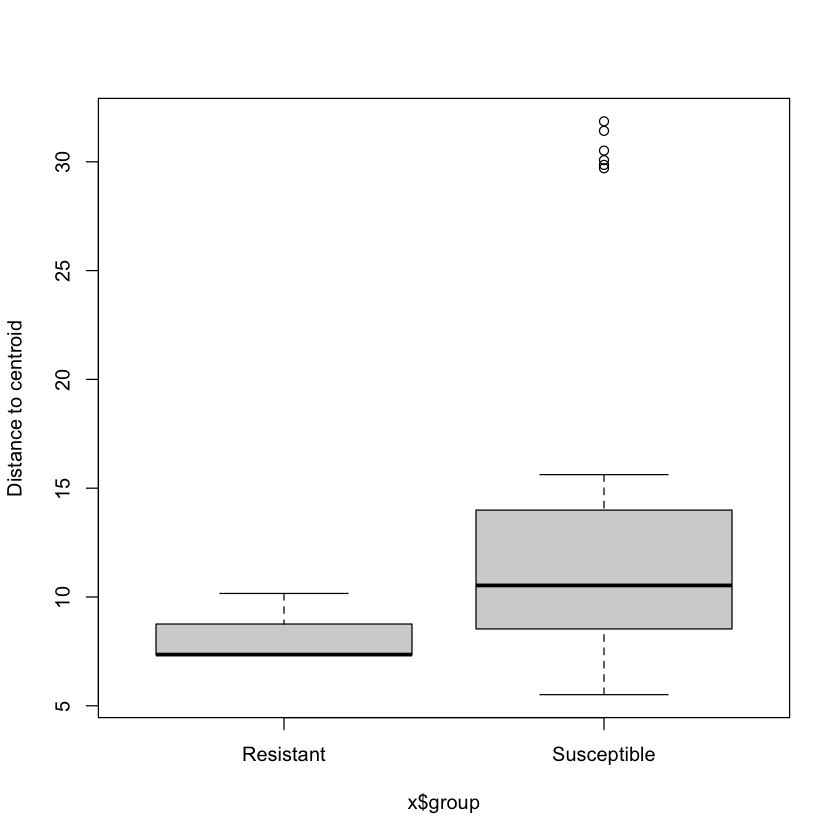

In [114]:


#distances between T-1 only test nutrient treatment
ps_clr <- vegdist(otu_table(t(ps_Am_Pl_fill_clr)), method ="euclidean")
## Calculate multivariate dispersions
mod_T1 <- betadisper(ps_clr, sample_data(ps_Am_Pl_fill_clr)$Disease_Susceptibility)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_T1)
permutest(mod_T1, pairwise = TRUE)
boxplot(mod_T1)


adonis(ps_clr~Disease_Susceptibility, 
       data= ps_clr_meta, permutations = 999,
         method = "euclidean", block="Genotype")


